<a href="https://colab.research.google.com/github/Utsav147/Google-Colab-TF-Practice/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2 as cv

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)
base_model = MobileNetV2(
    input_shape=IMAGE_SHAPE+(3,)
    # include_top=False,
    # weights="imagenet"
)
base_model.trainable = False

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
classifier = tf.keras.Sequential([
    base_model,
    # layers.GlobalAveragePooling2D(),
    # layers.Dense(128, activation="relu"),
    # layers.Dense(1, activation="sigmoid")
])

In [9]:
gold_fish=Image.open('hen.jpg').resize(IMAGE_SHAPE)
gold_fish=np.array(gold_fish)/255.0

In [10]:
result =classifier.predict(gold_fish[np.newaxis,...])
result.shape
# result

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


(1, 1000)

In [11]:
predicted_lable_index=np.argmax(result)
predicted_lable_index

np.int64(8)

In [12]:
image_labels=[]
with open('ImageNetLabels.txt', 'r') as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [13]:
image_labels[predicted_lable_index]

'hen'

***now for flower***

In [23]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [24]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [25]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [26]:
roses=list(data_dir.glob('roses/*'))
roses[:3]
tulips=list(data_dir.glob('tulips/*'))
tulips[:3]

[PosixPath('datasets/flower_photos/tulips/18378582936_ee7085c850.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713398906_28e59a225a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8673416556_639f5c88f1_n.jpg')]

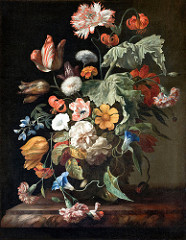

In [27]:
Image.open(str(roses[3]))
Image.open(str(tulips[3]))

In [28]:
flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [29]:
x,y=[],[]
for flower_name,images in flower_image_dict.items():
    for image in images:
        img=cv.imread(str(image))
        resized_image=cv.resize(img,(IMAGE_SHAPE))
        x.append(resized_image)
        y.append(flower_labels_dict[flower_name])

In [30]:
x=np.array(x)
y=np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [32]:
xtrain_scaled=xtrain/255
xtest_scaled=xtest/255

In [33]:
predicted=classifier.predict(np.array([x[0],x[1],x[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


array([556, 721, 721])

In [34]:
image_labels[721]

'pillow'

In [35]:
IMAGE_SHAPE = (224, 224, 3)
num_of_flowers = 5

# Feature extractor (replacement of TF Hub model)
base_model = MobileNetV2(
    input_shape=IMAGE_SHAPE,
)

base_model.trainable = False  # same as trainable=False in hub

model = models.Sequential([
    base_model,
    layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,543,989 (13.52 MB)

 Trainable params: 5,005 (19.55 KB)

 Non-trainable params: 3,538,984 (13.50 MB)

In [36]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(xtrain_scaled, ytrain, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - acc: 0.3128 - loss: 1.6035
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.4269 - loss: 1.5738
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.4478 - loss: 1.5469
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.4714 - loss: 1.5168
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - acc: 0.4789 - loss: 1.4971
